In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.linear_model import SGDRegressor,Lasso,Ridge
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA,TruncatedSVD
from lightgbm import LGBMRegressor
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Dropout,Embedding,Concatenate,Flatten
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.regularizers import l2,l1,l1_l2
#from tensorflow.keras.initializers import 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from pickle import dump
from pickle import load
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from tqdm import tqdm
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

In [2]:
# the best model is deep learning model using embedding layer--

def decontracted(phrase):
    # specific
    # in this function we are converting some short form to full form like won't to will not
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [3]:
stop_words=stopwords.words('english')
lemmatizer_=WordNetLemmatizer()
def preprocess_text_data(values):
    preprocessed_text=[]
    for sen in tqdm(values):
        sen=str(sen).lower()
        sen=decontracted(sen)
        # removing special characters
        sen=sen.replace("'s",' is').replace("’",'').replace('!','').replace(',',' ').replace('-',' ').replace('.','').replace('(','').replace(')','')\
            .replace('\r','').replace('\n','').replace('\"','').replace('&','').replace('=','').replace('?','').replace(':','').replace("'re",' are')\
            .replace("'ve",' have').replace("'m",' am').replace("'t",' not').replace("...",' ').replace("....",' ').replace('\\r','').replace('\\n','')\
            .replace('\\','').replace('*','').replace("'",'').replace(";",'').replace("+",'').replace("%",'').replace("  ",' ')
        
        sen=sen.replace('/',' ').replace('[',' ').replace(']',' ').replace('⚡️','').replace('✨','').replace('❤️','').replace('#','').replace('$','')
        # lemmatizing each word in sentences
        sen = ' '.join(lemmatizer_.lemmatize(e) for e in sen.split() if e.lower() not in stop_words and len(e)>2)
        # except a-z and A-Z remove all things from sentence.
        sen = re.sub('[^a-zA-Z \n\.]', '', sen)
        #sen = re.sub(" \d+", " ", sen)
        # reference -- https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
        regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
        sen=regrex_pattern.sub(r'',sen)
        preprocessed_text.append(sen.strip())
    return preprocessed_text


In [4]:
def subcat_fun(x,index):
    # print(index)
    try:
        c=x.split('/')[index]
    except:
        c='nan'
    return c    

In [5]:
def preprocessing_text_data(df1):

    df1['category_name']=df1['category_name'].apply(lambda x:str(x))
    df1['name']=preprocess_text_data(df1['name'].values)
    
    df1['category_name_len']=df1['category_name'].apply(lambda x:len(x.split('/')))
    
    df1['subcat1']=df1['category_name'].apply(subcat_fun,args=([0]))
    df1['subcat2']=df1['category_name'].apply(subcat_fun,args=([1]))
    df1['subcat3']=df1['category_name'].apply(subcat_fun,args=([2]))
    df1['subcat4']=df1['category_name'].apply(subcat_fun,args=([3]))
    df1['subcat5']=df1['category_name'].apply(subcat_fun,args=([4]))
    df1['item_description']=preprocess_text_data(df1['item_description'].values)
    df1['item_description']=df1['item_description'].apply(lambda x:'_'.join(x.split()) if x == 'description yet' else x)
    df1['name_each_sen_word']=df1['name'].apply(lambda x:len(x.split()))
    df1['item_desc_each_sentence_word']=df1['item_description'].apply(lambda x:len(x.split()))
    
    
    df1['subcat1']=df1['subcat1'].apply(lambda x:str(x))
    df1['subcat2']=df1['subcat2'].apply(lambda x:str(x))
    df1['subcat3']=df1['subcat3'].apply(lambda x:str(x))
    df1['subcat4']=df1['subcat4'].apply(lambda x:str(x))
    df1['subcat5']=df1['subcat5'].apply(lambda x:str(x))
    
    df1['brand_name']=df1['brand_name'].apply(lambda x:str(x).lower())
    df1['item_description']=df1['item_description'].apply(lambda x:str(x))
    df1['category_name']=df1['category_name'].apply(lambda x:str(x))
    
    df1['name']=df1['name'].apply(lambda x:str(x))

    df1.drop(columns=['train_id','category_name'],inplace=True)
    

    return df1


In [6]:

def encoding_padding_text_columns(train_column,max_len,data):
    t = load(open('tokenizer'+train_column+'1.pkl', 'rb'))

    encoded_data = t.texts_to_sequences(data[train_column].values)

    padded_data=pad_sequences(encoded_data, maxlen=max_len, padding='post')

    return padded_data



## tokenizing brand_name

def encoding_and_padding_catgories_column(column_name,data):
    t = load(open('tokenizer'+column_name+'.pkl', 'rb'))

    encoded_data = t.texts_to_sequences(data[column_name].values)

    encoded_data = np.array(encoded_data)

    return encoded_data

   
def min_max_scaling(column_name,data):

    scaler = load(open('scaler'+column_name+'.pkl', 'rb'))
    x_data=scaler.transform(data[column_name].values.reshape(-1,1))
    return x_data



In [9]:
def pipeline(data):
    # preprocessing and cleaning data
    if df.isnull().values.any():
        print('It is good to have no nan values in data')
    data = preprocessing_text_data(data)
    # encoding name column
    max_len_name=6
    padded_name_train = encoding_padding_text_columns(train_column='name',max_len=max_len_name,data=data)
    # encoding item_description column
    max_len_item_desc=30
    padded_item_description_train = encoding_padding_text_columns(train_column='item_description',
                                                                  max_len=max_len_item_desc,data=data)
    
    # encoding and padding categorical column
    encoded_br_name_train = encoding_and_padding_catgories_column('brand_name',data=data)
    encoded_s1_train = encoding_and_padding_catgories_column('subcat1',data=data)
    encoded_s2_train = encoding_and_padding_catgories_column('subcat2',data=data)
    encoded_s3_train = encoding_and_padding_catgories_column('subcat3',data=data)
    encoded_s4_train = encoding_and_padding_catgories_column('subcat4',data=data)
    encoded_s5_train = encoding_and_padding_catgories_column('subcat5',data=data)
    
    # scaling numerical columns
    x_tr_category_name_len = min_max_scaling(column_name='category_name_len',data=data)
    x_tr_item_condition_id = min_max_scaling(column_name='item_condition_id',data=data)
    x_tr_name_each_sen_word = min_max_scaling(column_name='name_each_sen_word',data=data)
    x_tr_item_desc_words_len = min_max_scaling(column_name='item_desc_each_sentence_word',data=data)

    x_tr_shipping=data['shipping'].values.reshape(-1,1).astype('float64')

    # stacking numerical columns
    x_tr_inp_num = sc.sparse.hstack((sc.sparse.csr_matrix(x_tr_category_name_len),x_tr_item_condition_id,
                                     x_tr_name_each_sen_word,x_tr_item_desc_words_len,x_tr_shipping))
    x_tr_inp_num=x_tr_inp_num.asformat(format='csr')

    model = load_model('best_model.h5')
    price = model.predict({"input1":x_tr_inp_num,"input2":encoded_br_name_train,"input3":encoded_s1_train,"input4":encoded_s2_train,
               "input5":encoded_s3_train,"input6":encoded_s4_train,"input7":encoded_s5_train,"input8":padded_name_train,
               "input9":padded_item_description_train})

    return price


In [10]:

df=pd.read_csv('mercari-price-suggestion-challenge/train.tsv', sep='\t')

y=df['price']
X=df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
columns=np.load('columns.npy',allow_pickle=True)
data=X_test.values[100:200]
if data.shape==(7,):
    data=[data]
df_data = pd.DataFrame(data,columns=columns)
price = pipeline(df_data)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 6267.55it/s]

It is good to have no nan values in data


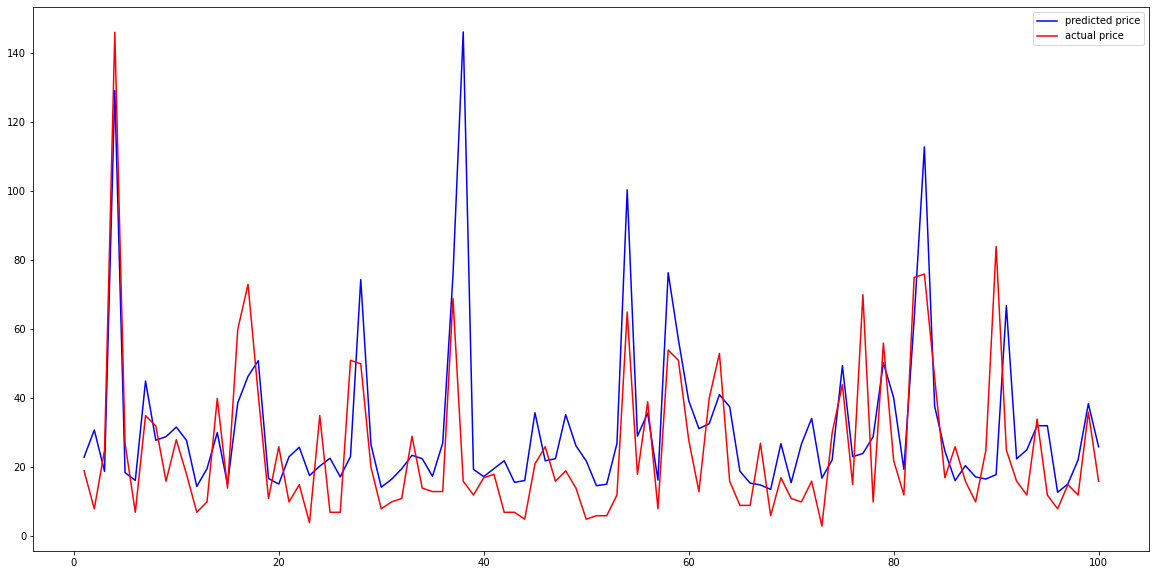

In [216]:
plt.figure(figsize=(20,10))
plt.plot(list(range(1,price.shape[0]+1)),price,c='b')
plt.plot(list(range(1,price.shape[0]+1)),y_test.values[100:200],c='r')
plt.legend(['predicted price','actual price'])
plt.show()